In [21]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt

## Character extraction with nltk

#### preprocess

In [22]:
def load_and_prep_nltk(path):
    """
    loads a book from specified location 
    removes punctuation and stopwords
    then applies tokenization and POS-tagging
    all with nltk
    """
    with open(path, 'r') as f:
        book = f.read()
#     book = nltk.tokenize.word_tokenize(book)
    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    book = tokenizer.tokenize(book)
    
    stop_words = set(nltk.corpus.stopwords.words('english'))
    book = [word for word in book if word not in stop_words]   
    
    book = nltk.pos_tag(book)
    return book

In [23]:
book = load_and_prep_nltk('data/GameOfThrones/A Game Of Thrones - George R. R. Martin.txt')
book

[('A', 'DT'),
 ('Game', 'NNP'),
 ('Thrones', 'NNP'),
 ('A', 'NNP'),
 ('Bantam', 'NNP'),
 ('Spectra', 'NNP'),
 ('Book', 'NNP'),
 ('SPECTRA', 'NNP'),
 ('portrayal', 'NN'),
 ('boxed', 'VBD'),
 ('trademarks', 'NNS'),
 ('Bantam', 'NNP'),
 ('Books', 'NNP'),
 ('division', 'NN'),
 ('Random', 'NNP'),
 ('House', 'NNP'),
 ('Inc', 'NNP'),
 ('PUBLISHING', 'NNP'),
 ('HISTORY', 'NNP'),
 ('Bantam', 'NNP'),
 ('hardcover', 'NN'),
 ('edition', 'NN'),
 ('published', 'VBN'),
 ('September', 'NNP'),
 ('1996', 'CD'),
 ('Bantam', 'NNP'),
 ('paperback', 'NN'),
 ('edition', 'NN'),
 ('September', 'NNP'),
 ('1997', 'CD'),
 ('Maps', 'NNP'),
 ('James', 'NNP'),
 ('Sinclair', 'NNP'),
 ('Heraldic', 'NNP'),
 ('crests', 'VBZ'),
 ('Virginia', 'NNP'),
 ('Norey', 'NNP'),
 ('All', 'NNP'),
 ('rights', 'NNS'),
 ('reserved', 'VBD'),
 ('Copyright', 'NNP'),
 ('1996', 'CD'),
 ('George', 'NNP'),
 ('R', 'NNP'),
 ('R', 'NNP'),
 ('Martin', 'NNP'),
 ('Library', 'NNP'),
 ('Congress', 'NNP'),
 ('Catalog', 'NNP'),
 ('Card', 'NNP'),
 ('Num

#### extract characters

In [24]:
NNPs = [word for word in book if word[1]=='NNP']
Counter(NNPs).most_common(20)

[(('Ser', 'NNP'), 953),
 (('Lord', 'NNP'), 926),
 (('Jon', 'NNP'), 820),
 (('Ned', 'NNP'), 783),
 (('Tyrion', 'NNP'), 564),
 (('Bran', 'NNP'), 539),
 (('Catelyn', 'NNP'), 484),
 (('Arya', 'NNP'), 453),
 (('Sansa', 'NNP'), 413),
 (('Robert', 'NNP'), 406),
 (('Robb', 'NNP'), 405),
 (('Dany', 'NNP'), 403),
 (('Stark', 'NNP'), 396),
 (('A', 'NNP'), 362),
 (('Lannister', 'NNP'), 345),
 (('Maester', 'NNP'), 255),
 (('Winterfell', 'NNP'), 242),
 (('My', 'NNP'), 241),
 (('King', 'NNP'), 232),
 (('Joffrey', 'NNP'), 228)]

In [25]:
book = nltk.ne_chunk(book)

In [26]:
entities = book.pos()

In [27]:
characters = [ent[0][0] for ent in entities if ent[1]=='PERSON']
nltk_chars = Counter(characters).most_common(40)
nltk_chars

[('Ser', 903),
 ('Jon', 737),
 ('Lord', 734),
 ('Ned', 564),
 ('Tyrion', 483),
 ('Bran', 481),
 ('Robert', 400),
 ('Catelyn', 400),
 ('Arya', 390),
 ('Dany', 374),
 ('Sansa', 366),
 ('Robb', 362),
 ('Stark', 333),
 ('Lannister', 235),
 ('Maester', 212),
 ('Drogo', 189),
 ('Joffrey', 187),
 ('Lady', 163),
 ('Jorah', 161),
 ('Eddard', 156),
 ('Luwin', 135),
 ('Tywin', 131),
 ('Khal', 123),
 ('Arryn', 122),
 ('Rodrik', 120),
 ('Mormont', 118),
 ('Bronn', 116),
 ('Lysa', 113),
 ('Varys', 102),
 ('Cersei', 99),
 ('Littlefinger', 99),
 ('Viserys', 97),
 ('Jaime', 96),
 ('Father', 89),
 ('Watch', 88),
 ('Dothraki', 84),
 ('Pycelle', 81),
 ('Will', 79),
 ('Jory', 79),
 ('Night', 77)]

## Character extraction with Spacy

#### preprocess

In [28]:
import spacy
import en_core_web_sm

In [29]:
def load_and_prep_spacy(path):
    """
    loads a book from specified location 
    removes stopwords
    then transforms book to Spacy's 'doc' format
    """
    with open(path, 'r') as f:
        book = f.read()
    
    nlp = en_core_web_sm.load()
    nlp.max_length = 2_000_000
    book = nlp(book)
    return book

In [30]:
book = load_and_prep_spacy('data/GameOfThrones/A Game Of Thrones - George R. R. Martin.txt')
book.ents

(SPECTRA,
 Bantam Books,
 Random House,
 September 1996,
 Bantam,
 September 1997,
 Maps,
 James Sinclair,
 Virginia Norey,
 1996,
 George R. R. Martin,
 Library,
 95-43936,
 Bantam Books,
 978-0-553-89784-5
 
 ,
 Bantam Books,
 Random House,
 Bantam Books,
 U.S. Patent and Trademark Office,
 Marca Registrada,
 Bantam Books,
 1540,
 Broadway,
 New York,
 New York,
 10036,
 Melinda,
 MAPS,
 PROLOGUE
 
 
 ,
 CATELYN,
 DAENERYS,
 EDDARD,
 JON,
 CATELYN,
 ARYA,
 JON
 ,
 DAENERYS,
 EDDARD,
 EDDARD,
 CATELYN,
 JON
 ,
 EDDARD,
 DAENERYS,
 EDDARD,
 JON,
 EDDARD,
 CATELYN,
 CATELYN,
 DAENERYS,
 EDDARD,
 CATELYN,
 JON,
 EDDARD,
 DAENERYS,
 EDDARD,
 JON,
 EDDARD,
 ARYA,
 JON
 ,
 DAENERYS,
 CATELYN,
 JON
 ,
 DAENERYS,
 DAENERYS,
 ARYA,
 JON
 ,
 CATELYN,
 DAENERYS,
 HOUSE,
 HOUSE,
 HOUSE,
 HOUSE,
 HOUSE,
 HOUSE,
 HOUSE,
 GREYJOY,
 HOUSE,
 Waymar Royce,
 fifty,
 Gared,
 Eight days,
 nine,
 Ser Waymar Royce,
 Gared,
 Gared’s,
 forty years,
 the Night’s Watch,
 four years,
 first,
 hundred,
 tonight,


#### extract characters

In [31]:
characters = [ent.text for ent in book.ents if ent.label_=='PERSON']
spacy_chars = Counter(characters).most_common(40)
spacy_chars

[('Ned', 730),
 ('Jon', 656),
 ('Catelyn', 418),
 ('Arya', 386),
 ('Robb', 339),
 ('Robert', 329),
 ('Sansa', 258),
 ('Joffrey', 200),
 ('Dany', 191),
 ('’m', 146),
 ('Dothraki', 121),
 ('Ser Jorah', 115),
 ('Luwin', 111),
 ('Littlefinger', 110),
 ('Stark', 102),
 ('Mormont', 100),
 ('Ser Rodrik', 91),
 ('Sam', 80),
 ('Grace', 76),
 ('Eyrie', 72),
 ('Jaime', 71),
 ('Hand', 67),
 ('Eddard Stark', 60),
 ('Khal Drogo', 54),
 ('Kingsguard', 53),
 ('Hodor', 53),
 ('Bronn', 52),
 ('Septa Mordane', 50),
 ('Grenn', 50),
 ('Aemon', 49),
 ('Rickon', 49),
 ('Jon Snow', 47),
 ('Jon Arryn', 47),
 ('Starks', 45),
 ('Khaleesi', 45),
 ('’s', 44),
 ('Mirri Maz Duur', 44),
 ('Theon Greyjoy', 40),
 ('Tywin', 40),
 ('Robert’s', 39)]

## Comparison & conclusions

From what we can see NLTK extracts only three types of entities, and makes lots of mistakes labeling 'Night' or 'Watch' as people. It's entities consist of one word, which creates lots of duplicates. 

Spacy does better job, it extracts more kinds of entities than nltk. It still has some false positives like "'m" that are separated from consecutive word in the text, but other than that all characters seem to be properly extracted with their full names like 'Ser Jorah' or 'Eddard Stark'. 

In [52]:
def visualize(chars, title):
    height = [char[1] for char in chars]
    bars = [char[0] for char in chars]
    y_pos = np.arange(len(bars))

    plt.title(title)
    plt.barh(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    plt.yticks(y_pos, bars)
    plt.show()


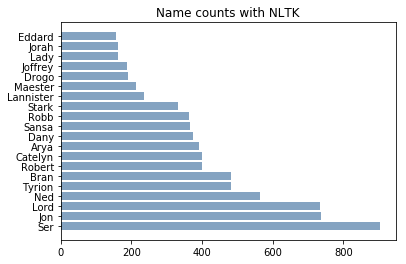

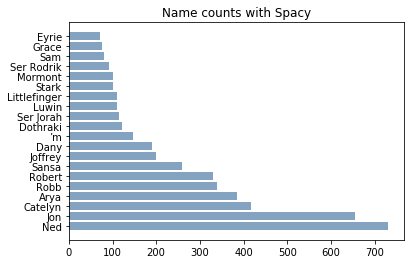

In [54]:
visualize(nltk_chars[:20], 'Name counts with NLTK')
visualize(spacy_chars[:20], 'Name counts with Spacy')